<a href="https://colab.research.google.com/github/SujithSajeev-17/Machine_Learning/blob/main/KNN_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Iris Dataset**

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

#**K-Nearest Neighbor**

K-Nearest Neighbors (KNN) is a simple yet powerful algorithm used in machine learning for classification and regression tasks. It works on the principle of finding the K nearest data points in the feature space and making predictions based on the majority class or the average of the K nearest neighbors. KNN is particularly suitable for applications where the decision boundary is irregular or difficult to define mathematically. Its simplicity and effectiveness make it a popular choice for various predictive modeling tasks, including healthcare diagnostics like diabetes prediction. With proper tuning and feature engineering, KNN can provide accurate and reliable predictions, making it a valuable tool in the arsenal of machine learning practitioners.

###**Data Preprocessing**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report

In [2]:
df = pd.read_csv('/content/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df=df.drop(['Id'],axis=1)

###**Data Visualisation**

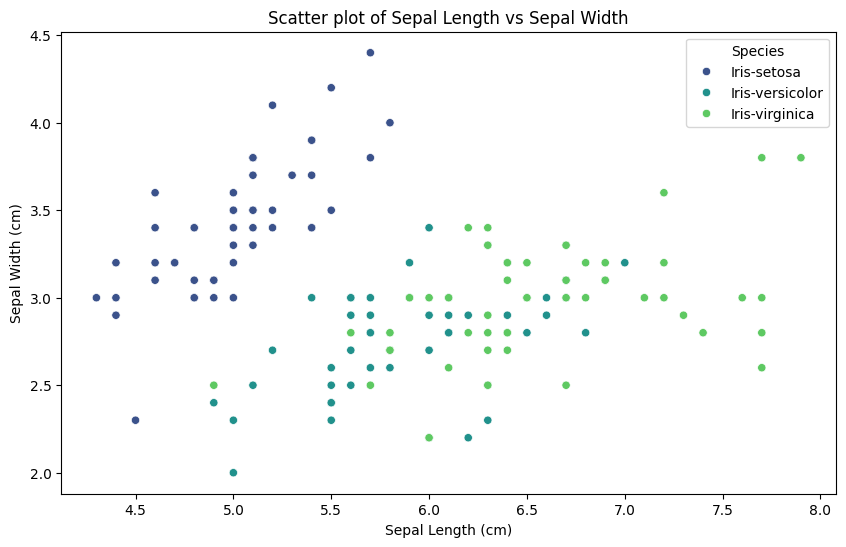

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='viridis')
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

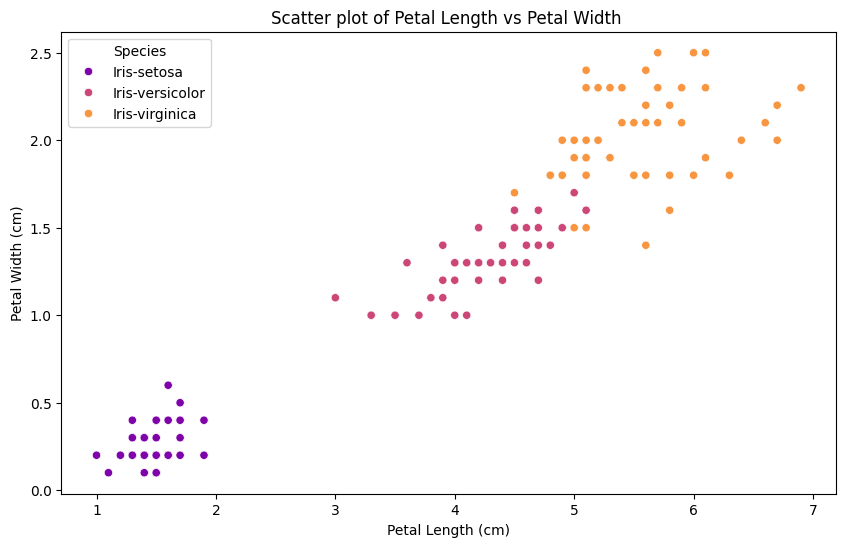

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species',palette='plasma')
plt.title('Scatter plot of Petal Length vs Petal Width ')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

In [11]:
# Correlation matrix
correlation = df.corr()
correlation

<ipython-input-11-712835ba59c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


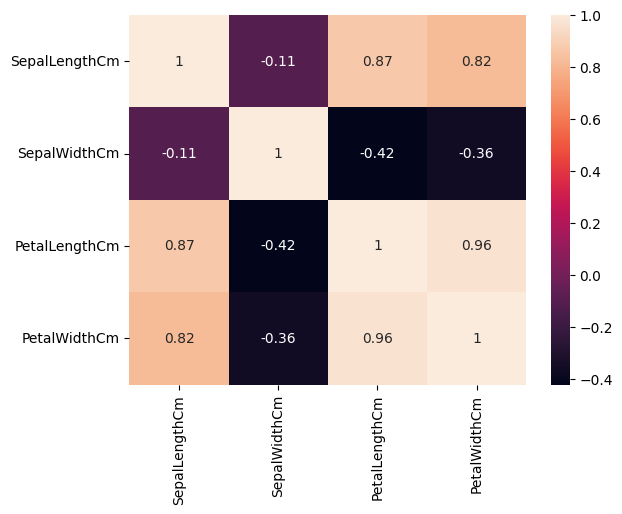

In [12]:
sns.heatmap(correlation,annot=True)
plt.show()

In [13]:
# Separating features and target variable
x= df.iloc[:,:-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
y = df.iloc[:,-1].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

###**Train and Test data Separation**


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)
x_train

array([[7.7, 2.6, 6.9, 2.3],
       [5.7, 3.8, 1.7, 0.3],
       [5. , 3.6, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [5.2, 2.7, 3.9, 1.4],
       [5.1, 3.4, 1.5, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [7.7, 3.8, 6.7, 2.2],
       [6.9, 3.1, 5.4, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [6.2, 2.8, 4.8, 1.8],
       [6. , 3.4, 4.5, 1.6],
       [7.7, 2.8, 6.7, 2. ],
       [5.7, 3. , 4.2, 1.2],
       [4.8, 3.4, 1.6, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3. , 1.4, 0.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [4.6, 3.4, 1.4, 0.3],
       [6.1, 3. , 4.9, 1.8],
       [6.5, 3.2, 5.1, 2. ],
       [6.7, 3.1, 4.4, 1.4],
       [5.7, 2.8, 4.5, 1.3],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 3. , 4.8, 1.8],
       [5.1, 3.8, 1.6, 0.2],
       [6. , 2.2, 4. , 1. ],
       [6.4, 2.9, 4.3, 1.3],
       [6.5, 3. , 5.5, 1.8],
       [5. , 2.3, 3.3, 1. ],
       [6.3, 3.3, 6. , 2.5],
       [5.5, 2

In [16]:
x_test

array([[5.8, 4. , 1.2, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.9, 3.8, 6.4, 2. ],
       [6.3, 3.3, 4.7, 1.6],
       [6.9, 3.1, 5.1, 2.3],
       [5.1, 3.8, 1.9, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.7, 4.2, 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [7.1, 3. , 5.9, 2.1],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 2.9, 4.5, 1.5],
       [4.4, 3.2, 1.3, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5.6, 3. , 4.5, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [5.4, 3. , 4.5, 1.5],
       [6.7, 3. , 5. , 1.7],
       [5. , 3.5, 1.3, 0.3],
       [7.2, 3.2, 6. , 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [6.1, 2.8, 4.7, 1.2],
       [6.3, 2.5, 5. , 1.9],
       [6.1, 3. , 4.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.6, 2.5, 3.9, 1.1],
       [6.4, 2.8, 5.6, 2.1],
       [5.8, 2

In [17]:
y_train

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-ver

In [18]:
y_test

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

###**Feature Scaling**
- Scaling the features to have a mean of 0 and a standard deviation of 1

In [19]:
scalar = StandardScaler()
scalar.fit(x_train)
x_train= scalar.transform(x_train)
x_test = scalar.transform(x_test)

###**Model Creation**


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [21]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

###**Prediction**

In [22]:
y_predict = knn.predict(x_test)
y_predict

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [23]:
y_test


array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

###**Performance Evaluation**

In [24]:
cm = confusion_matrix(y_predict,y_test)
cm

array([[14,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 12]])

In [25]:
ac_score = accuracy_score(y_predict,y_test)
ac_score

0.9777777777777777

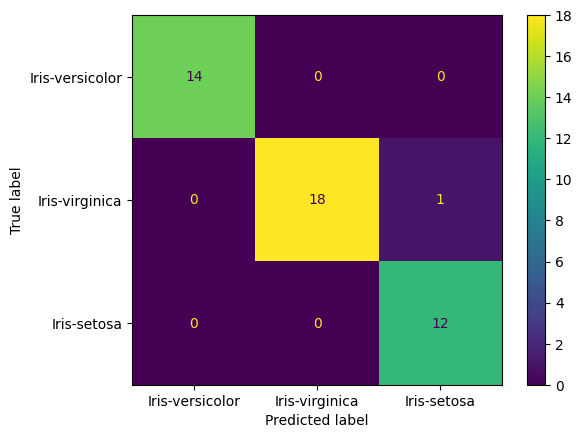

In [26]:
label=['Iris-versicolor', 'Iris-virginica','Iris-setosa']
cmd = ConfusionMatrixDisplay(cm,display_labels=label)
cmd.plot()

In [27]:
report = classification_report(y_predict,y_test)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.95      0.97        19
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

